In [1]:
# Function to load images and map each image with an ID

import numpy as np
import os

path = "/ComputerVisionAdv/"
class IdentityMetadata():
    def __init__(self, base, name, file):
       
        self.base = base  #base
        
        self.name = name  #name
        
        self.file = file  #image

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

In [2]:
path1= "D:/AIML notebooks/Pythonscripts/ComputerVisionAdv/PINS/pins_alexandra daddario/alexandra daddario34.JPG"
print(os.path.exists(path1))

True


In [3]:
# here load_image function loads image from metadata.
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    return img[...,::-1]

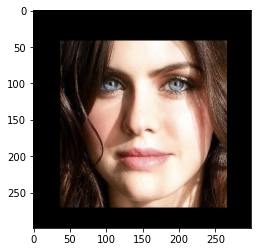

In [4]:
from matplotlib import pyplot as plt

plt.imshow(load_image(path1))

In [5]:
# Now we are going to use pre-defined model for VGG Face

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [6]:
# Loading the model and then face weights.

model = vgg_face()
model.summary()

model.load_weights('./Part 3 - vgg_face_weights.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [7]:
# VGG face descriptor

from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

model.layers[0].input, model.layers[-2].output

(<tf.Tensor 'zero_padding2d_input:0' shape=(None, 224, 224, 3) dtype=float32>,
 <tf.Tensor 'flatten/Reshape:0' shape=(None, 2622) dtype=float32>)

#  Generate Embedding vectors for all images in the dataset
embeddings = np.zeros((metadata.shape[0], 2622))

for i, m in enumerate(metadata):

    img = load_image(m.image_path())
    
    img = (img / 255.).astype(np.float32) # Normalizing the pixel values.
    
    img = cv2.resize(img, dsize = (224,224)) # Resizing dimensions.
    try:
        # Getting embeddings using VGG face descriptor.
        embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    except:
        embeddings[i]=np.zeros(2622*1)

### Generating embeddings vectors for all images kept on going forever and my laptop couldn't handle it.

In [8]:
# Calculating distance between two given images.
def dist(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

In [9]:
import matplotlib.pyplot as plt
embeddings = np.zeros((metadata.shape[0], 2622))

def show_pair(e1, e2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {dist(embeddings[e1], embeddings[e2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[e1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[e2].image_path())); 

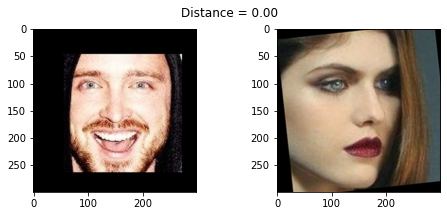

In [10]:
show_pair(60,90)

In [11]:
# training and testing datasets.

train_data = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_data = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_data]
# another half as test examples of 10 identities
X_test = embeddings[test_data]


from sklearn.preprocessing import LabelEncoder

targets = np.array([m.name for m in metadata])

encoder = LabelEncoder()
y = encoder.fit_transform(targets)

#train labels
y_train = y[train_data]
#test labels
y_test = y[test_data]

In [12]:
# Encoding

from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [13]:
# Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [14]:
# Reducing dimensions using PCA

from sklearn.decomposition import PCA

pca_128 = PCA(n_components=128)
X_train=pca_128.fit_transform(X_train)
X_test=pca_128.fit_transform(X_test)

C:\Anaconda\lib\site-packages\sklearn\decomposition\_pca.py:554: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()
C:\Anaconda\lib\site-packages\sklearn\decomposition\_pca.py:554: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


In [15]:
# Building an SVM classifier.

from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(svm_model.predict(X_test), y_test)

0.01670843776106934

* Accuracy for the SVC model to predict a given image is 0.0167.

### Results.

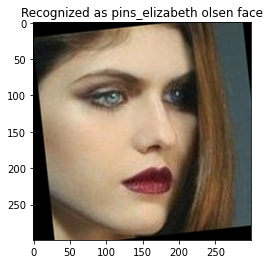

In [18]:
import warnings

warnings.filterwarnings('ignore')

example = 10

test = [embeddings[test_data][example]]
test = pca_128.transform(test)

example_image = load_image(metadata[test_data][example].image_path())
example_pred = svm_model.predict(test)
example_identity = encoder.inverse_transform(example_pred)[0]

plt.imshow(example_image)
plt.title(f'Recognized as {example_identity}');

#### But, it is

In [19]:
metadata[test_data][example]

PINS\pins_alexandra daddario\alexandra daddario101.jpg